In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Principal Component Analysis

In [37]:
usarrest= pd.read_csv('Dataset/USArrests.csv', index_col=0)
usarrest.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [38]:
scaler= StandardScaler()
scale_usarrest = scaler.fit_transform(usarrest)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [39]:
pca_loadings = pd.DataFrame(PCA().fit(scale_usarrest).components_.T, index=usarrest.columns, columns=['V1', 'V2', 'V3', 'V4'])
pca_loadings

,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [40]:
pca= PCA()
std_pca_df= pd.DataFrame(pca.fit_transform(scale_usarrest),index =usarrest.index, columns =['P1','P2','P3','P4'])

In [41]:
std_pca_df.head()

,P1,P2,P3,P4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


In [42]:
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])


We typically decide on the number of principal components required to visualize the data by examining a scree plot. This is done by eyeballing the scree plot, and looking for a point at which the proportion of variance explained by each subsequent principal component drops off. This is often referred to as an elbow in the scree plot.For example, one might conclude that a fair amount of variance is explained by the first two principal components, and that there is an elbow after the second component. After all, the third principal component explains less than ten percent of the variance in the data, and the fourth principal component explains less than half that and so is essentially worthless.

Text(0,0.5,'Prop.Variance Explained')

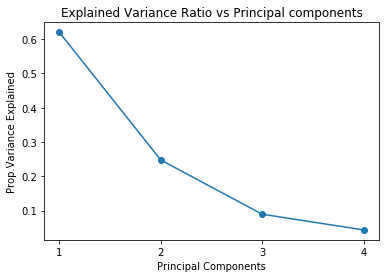

In [56]:
plt.plot([1,2,3,4],pca.explained_variance_ratio_, marker= 'o')
plt.xticks([1,2,3,4])
plt.title('Explained Variance Ratio vs Principal components')
plt.xlabel('Principal Components')
plt.ylabel('Prop.Variance Explained')

Text(0,0.5,'Cumulative Prop. Variance Explained')

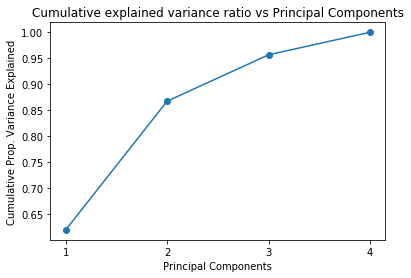

In [54]:
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), marker ='o')
plt.xticks([1,2,3,4])
plt.title('Cumulative explained variance ratio vs Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Prop. Variance Explained')

In [31]:
pca_df= pd.DataFrame(pca.fit_transform(usarrest),index =usarrest.index, columns =['P1','P2','P3','P4'])
pca_df.head()

,P1,P2,P3,P4
Alabama,64.802164,11.448007,-2.494933,2.407901
Alaska,92.827450,17.982943,20.126575,-4.094047
Arizona,124.068216,-8.830403,-1.687448,-4.353685
Arkansas,18.340035,16.703911,0.210189,-0.520994
California,107.422953,-22.520070,6.745873,-2.811826


In [32]:
pca.explained_variance_ratio_

array([9.65534221e-01, 2.78173366e-02, 5.79953492e-03, 8.48907879e-04])

In [33]:
np.sqrt(pca.explained_variance_)

array([83.73240025, 14.21240185,  6.48942607,  2.48279   ])

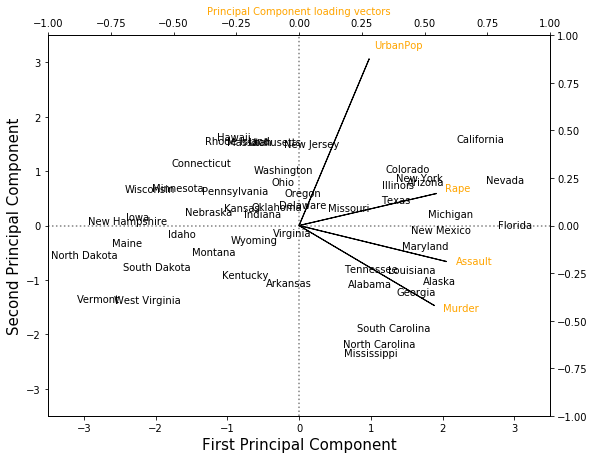

In [13]:
fig , ax1 = plt.subplots(figsize=(9,7))
ax1.set_xlabel('Principal Component 1', fontsize=15)
ax1.set_ylabel('Principal Component 2', fontsize =15)

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in std_pca_df.index:
    ax1.annotate(i, (std_pca_df.P1.loc[i], -std_pca_df.P2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='orange')

# Plot vectors
ax2.arrow(0,0,pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,pca_loadings.V1[3], -pca_loadings.V2[3]);

## Unscaled

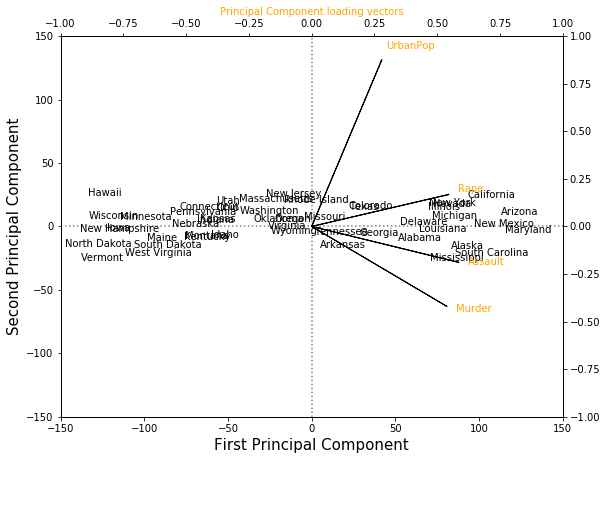

In [21]:
fig , ax3 = plt.subplots(figsize=(9,7))
ax3.set_xlabel('Principal Component 1', fontsize=15)
ax3.set_ylabel('Principal Component 2', fontsize =15)

ax3.set_xlim(-150,150)
ax3.set_ylim(-150,150)

# Plot Principal Components 1 and 2
for i in pca_df.index:
    ax3.annotate(i, (pca_df.P1.loc[i], -pca_df.P2.loc[i]), ha='center')

# Plot reference lines
ax3.hlines(0,-150,150, linestyles='dotted', colors='grey')
ax3.vlines(0,-150,150, linestyles='dotted', colors='grey')

ax3.set_xlabel('First Principal Component')
ax3.set_ylabel('Second Principal Component')

# Plot Principal Component loading vectors, using a second y-axis.
ax4 = ax3.twinx().twiny() 

ax4.set_ylim(-1,1)
ax4.set_xlim(-1,1)
ax4.tick_params(axis='y', colors='orange')
ax4.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax4.annotate(i, (pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='orange')

# Plot vectors
ax4.arrow(0,0,pca_loadings.V1[0], -pca_loadings.V2[0])
ax4.arrow(0,0,pca_loadings.V1[1], -pca_loadings.V2[1])
ax4.arrow(0,0,pca_loadings.V1[2], -pca_loadings.V2[2])
ax4.arrow(0,0,pca_loadings.V1[3], -pca_loadings.V2[3]);

## Clustering Methods
### Kmeans

In [57]:
# Generate data
np.random.seed(2)
X = np.random.standard_normal((50,2))
X[:25,0] = X[:25,0]+3
X[:25,1] = X[:25,1]-4

In [59]:
X

array([[ 2.58324215, -4.05626683],
       [ 0.8638039 , -2.35972919],
       [ 1.20656441, -4.84174737],
       [ 3.50288142, -5.24528809],
       [ 1.94204778, -4.90900761],
       [ 3.55145404, -1.70779199],
       [ 3.04153939, -5.11792545],
       [ 3.53905832, -4.5961597 ],
       [ 2.9808695 , -2.82499878],
       [ 2.25212905, -3.99097475],
       [ 2.12189211, -4.15643417],
       [ 3.25657045, -4.98877905],
       [ 2.66117803, -4.23618403],
       [ 2.36234499, -5.18761229],
       [ 1.57878277, -4.1534952 ],
       [ 2.73094304, -1.76863321],
       [ 0.56523242, -3.8872735 ],
       [ 3.37044454, -2.64036614],
       [ 3.50185721, -4.8442137 ],
       [ 3.00000976, -3.45764743],
       [ 2.6864918 , -3.22898826],
       [ 1.13190935, -2.26881533],
       [ 4.46767801, -4.33567734],
       [ 3.61134078, -3.95202941],
       [ 2.17086471, -3.91228978],
       [ 1.00036589, -0.38109252],
       [-0.37566942, -0.07447076],
       [ 0.43349633,  1.27837923],
       [-0.63467931,

### Number of cluster is 2

In [61]:
from sklearn.cluster import KMeans
k2 =KMeans(n_clusters=2, n_init= 20)
k2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=20, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [65]:
k2.cluster_centers_

array([[-0.23940153,  0.14703307],
       [ 2.53287159, -3.80815122]])

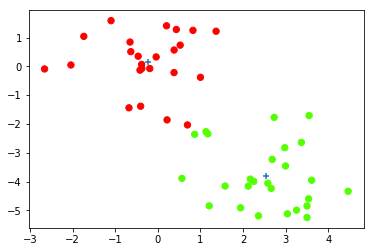

In [69]:
plt.scatter(X[:,0], X[:,1], s=40, c=k2.labels_, cmap=plt.cm.prism)
plt.scatter(k2.cluster_centers_[:,0],k2.cluster_centers_[:,1], marker ='+')

### Number of cluster is 3

In [70]:
k3= KMeans(n_clusters=3, n_init=20)
k3.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [71]:
k3.cluster_centers_

array([[ 2.82805911, -4.11351797],
       [-0.27876523,  0.51224152],
       [ 0.69945422, -2.14934345]])

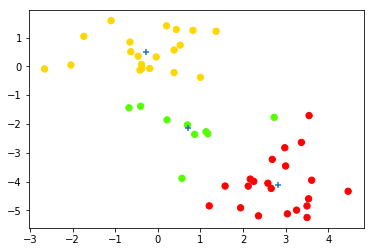

In [78]:
plt.scatter(X[:,0], X[:,1], s=40, c=k3.labels_, cmap=plt.cm.prism)
plt.scatter(k3.cluster_centers_[:,0],k3.cluster_centers_[:,1], marker ='+')

### Hierarchical Clustering

In [82]:
from sklearn.cluster import AgglomerativeClustering

In [83]:
hc_complete= AgglomerativeClustering(linkage='complete')
hc_average=AgglomerativeClustering(linkage='average')
hc_single = AgglomerativeClustering(linkage='single')

In [84]:
hc_complete.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=2, pooling_func='deprecated')

In [85]:
hc_complete.labels_

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [86]:
from scipy.cluster.hierarchy import dendrogram, linkage
l_c= linkage(X, method ='complete')

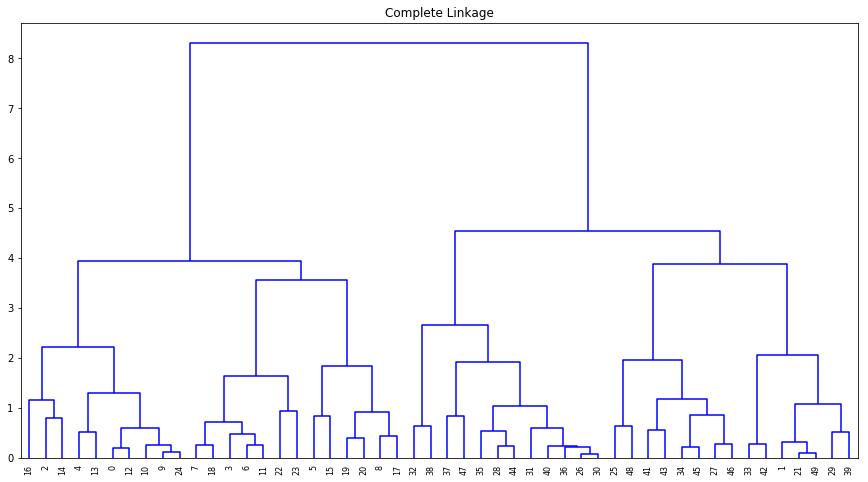

In [99]:
fig, axes = plt.subplots(1, 1, figsize=(15, 8))
dendrogram(l_c, ax=axes, color_threshold=0)
plt.title('Complete Linkage')
plt.show()

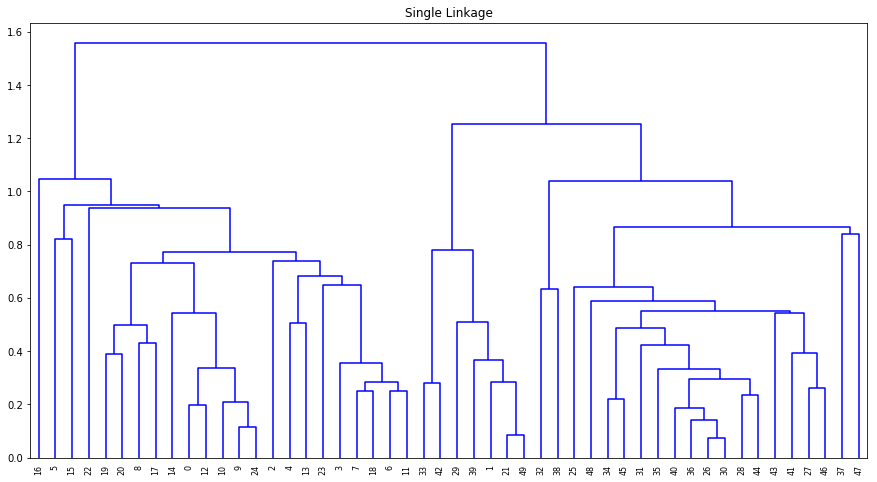

In [97]:
l_s= linkage(X, method ='single')
fig, axes = plt.subplots(1, 1, figsize=(15, 8))
dendrogram(l_s, ax=axes, color_threshold=0)
plt.title('Single Linkage')
plt.show()

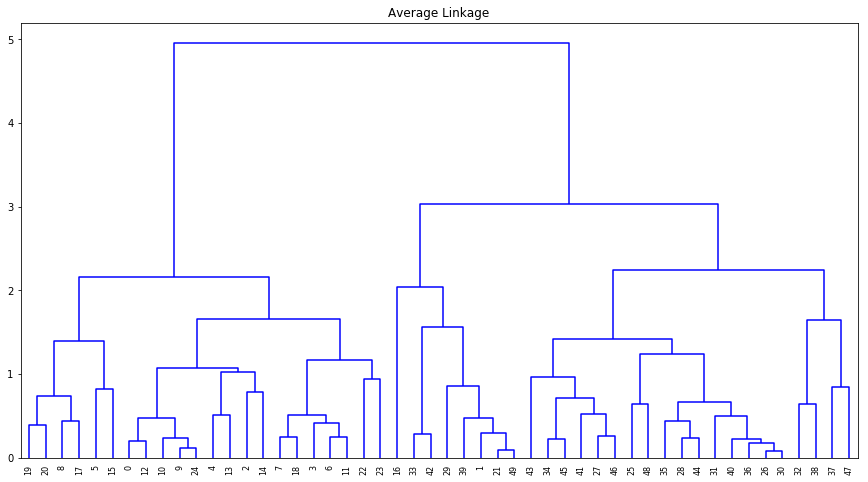

In [98]:
l_a= linkage(X, method ='average')
fig, axes = plt.subplots(1, 1, figsize=(15, 8))
dendrogram(l_a, ax=axes, color_threshold=0)
plt.title('Average Linkage')
plt.show()

## Lab 3: NCI60 Data Example

In [104]:
X= pd.read_csv('Dataset/NCI60_X.csv').drop('Unnamed: 0', axis=1)

In [105]:
X.head()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
0,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654981,...,-0.990019,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
1,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285020,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
2,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
3,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350020,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
4,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [106]:
X.shape

(64, 6830)

In [110]:
y= pd.read_csv('Dataset/NCI60_y.csv').drop('Unnamed: 0', axis=1)

In [112]:
y.shape

(64, 1)

Examining the cancer types for the cell lines

In [116]:
y.x.value_counts()

NSCLC          9
RENAL          9
MELANOMA       8
BREAST         7
COLON          7
LEUKEMIA       6
OVARIAN        6
CNS            5
PROSTATE       2
MCF7A-repro    1
K562B-repro    1
MCF7D-repro    1
K562A-repro    1
UNKNOWN        1
Name: x, dtype: int64

### PCA on the NCI60 Data

In [146]:
std_X= scaler.fit_transform(X)
pr_out=PCA().fit(std_X)
pr_out_df= pd.DataFrame(PCA().fit_transform(X))

In [147]:
pr_out.explained_variance_ratio_

array([1.13589419e-01, 6.75620253e-02, 5.75184223e-02, 4.24755448e-02,
       3.73497235e-02, 3.61863019e-02, 3.06622240e-02, 2.68590309e-02,
       2.52949807e-02, 2.37586884e-02, 2.35655815e-02, 2.16412198e-02,
       2.04909747e-02, 1.97881793e-02, 1.91541737e-02, 1.77176082e-02,
       1.66272971e-02, 1.61075898e-02, 1.59433320e-02, 1.55991861e-02,
       1.50721674e-02, 1.48009892e-02, 1.43576234e-02, 1.36277104e-02,
       1.32350200e-02, 1.27519917e-02, 1.25903703e-02, 1.20979413e-02,
       1.18098781e-02, 1.12098170e-02, 1.08277440e-02, 1.04477523e-02,
       1.02647051e-02, 9.88274535e-03, 9.74257138e-03, 9.31114503e-03,
       9.14795316e-03, 8.95640894e-03, 8.72950586e-03, 8.42575751e-03,
       8.13979814e-03, 7.89749805e-03, 7.39000998e-03, 7.20101586e-03,
       7.08918353e-03, 6.90272334e-03, 6.78495251e-03, 6.47012955e-03,
       6.40883777e-03, 6.01193511e-03, 5.66418607e-03, 5.63402788e-03,
       5.38935217e-03, 5.12786334e-03, 5.11796180e-03, 4.81620125e-03,
      

Text(0.5,0,'Principal components')

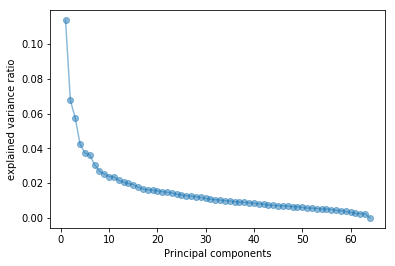

In [157]:
plt.plot(range(1,65), pr_out.explained_variance_ratio_, marker= 'o', alpha=0.5)
plt.ylabel('explained variance ratio')
plt.xlabel('Principal components')

Text(0.5,0,'Principal components')

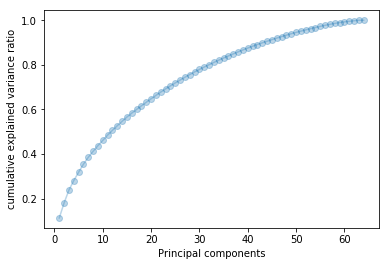

In [158]:
plt.plot(range(1,65), np.cumsum(pr_out.explained_variance_ratio_), marker= 'o', alpha =0.3)
plt.ylabel('cumulative explained variance ratio')
plt.xlabel('Principal components')

Text(0.5,0,'Principal Component 1')

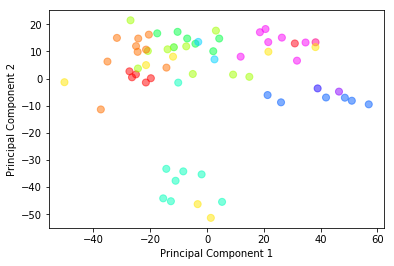

In [155]:
color_idx = pd.factorize(y.x)[0]
plt.scatter(pr_out_df.iloc[:,0], -pr_out_df.iloc[:,1], c=color_idx, cmap=plt.cm.hsv, alpha=0.5, s=50)
plt.ylabel('Principal Component 2')
plt.xlabel('Principal Component 1')

Text(0.5,0,'Principal Component 1')

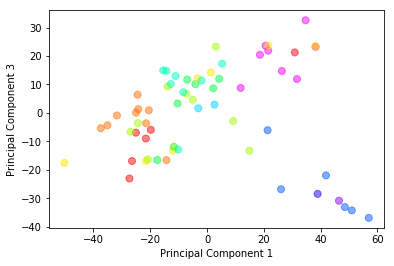

In [151]:
plt.scatter(pr_out_df.iloc[:,0], -pr_out_df.iloc[:,2], c=color_idx, cmap=plt.cm.hsv, alpha=0.5, s=50)
plt.ylabel('Principal Component 3')
plt.xlabel('Principal Component 1')

### Clustering the Observations of the NCI60 Data

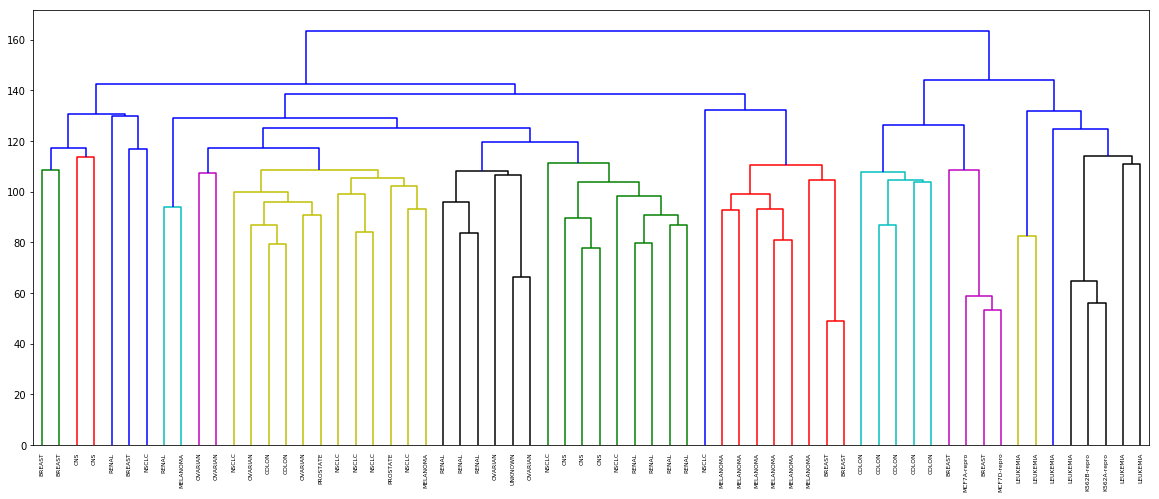

In [172]:
deng_plot= pd.DataFrame(std_X, index=y.x)
hc_c= linkage(std_X, method='complete')
fig, axes = plt.subplots(1, 1, figsize=(20, 8))
dendrogram(hc_c, labels=deng_plot.index)
plt.show()

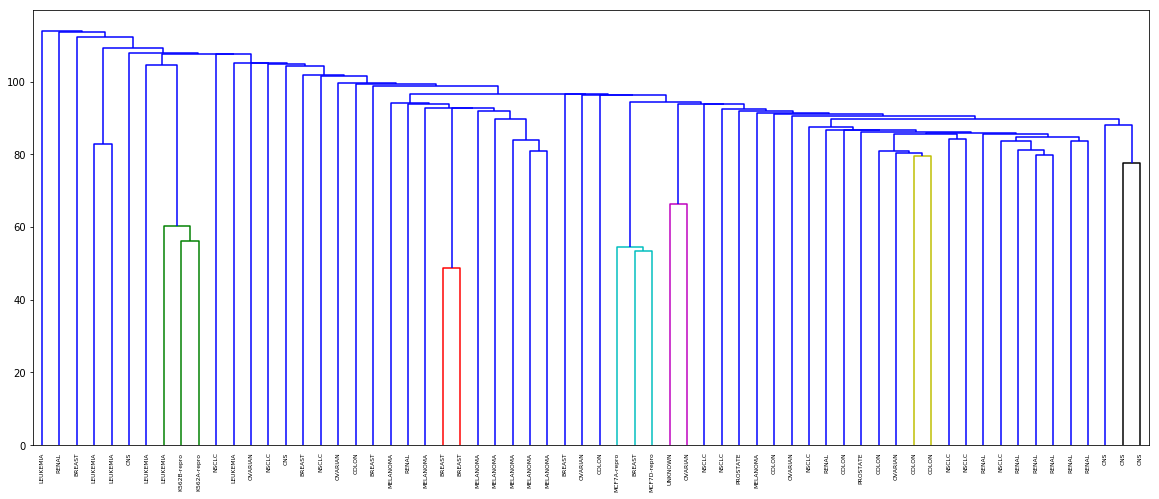

In [173]:
hc_s= linkage(std_X, method='single')
fig, axes = plt.subplots(1, 1, figsize=(20, 8))
dendrogram(hc_s, labels=deng_plot.index)
plt.show()

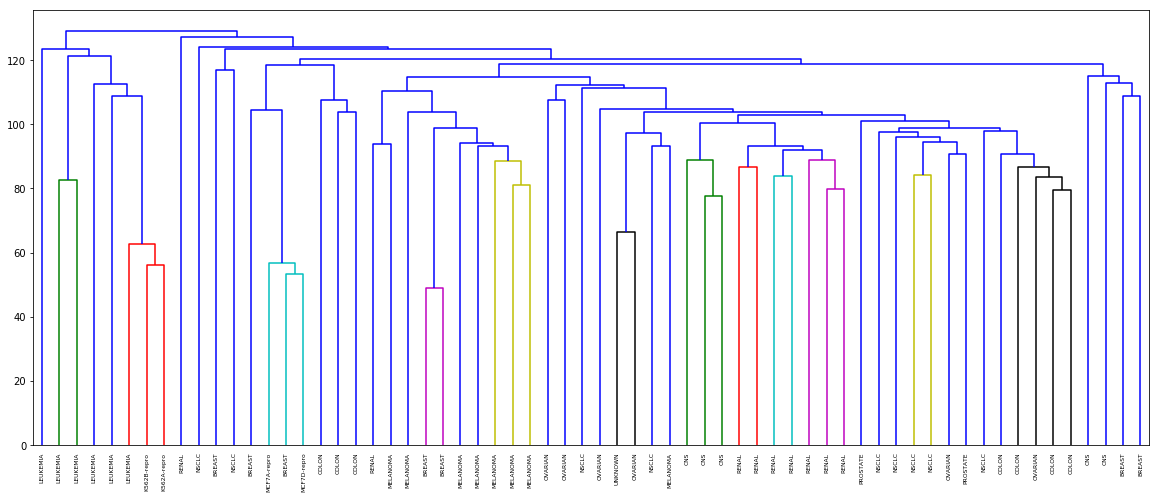

In [174]:
hc_a= linkage(std_X, method='average')
fig, axes = plt.subplots(1, 1, figsize=(20, 8))
dendrogram(hc_a, labels=deng_plot.index)
plt.show()

### Kmean with n=4

In [175]:
k4= KMeans(n_clusters=4, n_init=20)
k4.fit(std_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=20, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [176]:
k4.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int32)